# Simple Neural Implementation of Iterative MAP Calculation (WITH LEARNING)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [3]:
# Util funcs
def g(v):
    return np.square(v)

def dg(v):
    return 2*v

In [7]:
# Network dynamics
def init(u=2, v_p=3, Sigma_u=1, Sigma_p=1, phi=3, eps_u=0, eps_p=0):
    state = {
        'u': u,
        'v_p': v_p,
        'Sigma_u': Sigma_u,
        'Sigma_p': Sigma_p,
        # Update these
        'phi': [phi],
        'eps_u': [eps_u],
        'eps_p': [eps_p],
        't': 0,
    }
    return state


def update(state, dt=0.01):
    state['eps_p'].append(state['eps_p'][-1] + dt * (state['phi'][-1] - state['v_p'] - state['Sigma_p'] * state['eps_p'][-1]))
    state['eps_u'].append(state['eps_u'][-1] + dt * (state['u'] - g(state['phi'][-1]) - state['Sigma_u'] * state['eps_u'][-1]))
    state['phi'].append(state['phi'][-1] + dt * (state['eps_u'][-1] * dg(state['phi'][-1]) - state['eps_p'][-1]))
    state['t'] += dt
    return state


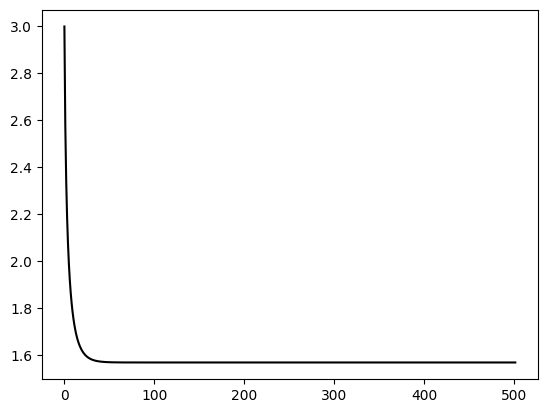

In [9]:
# Fig 2.a
state = init()

while state['t'] < 5:
    eps_p = (state['v_p'] - state['phi'][-1]) / state['Sigma_p']
    eps_u = (state['u'] - g(state['phi'][-1])) / state['Sigma_u']
    state['phi'].append(state['phi'][-1] + 0.01 * (eps_p + eps_u * dg(state['phi'][-1])))
    state['t'] += 0.01

plt.plot(state['phi'], color='black')

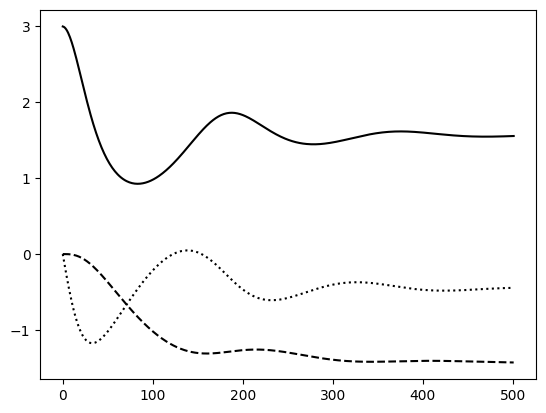

In [5]:
# Fig 2.b
state = init()

while state['t'] < 5:
    state = update(state)

plt.plot(state['phi'], color='black')
plt.plot(state['eps_p'], linestyle='--', color='black')
plt.plot(state['eps_u'], linestyle='dotted', color='black')